In [2]:
%matplotlib inline

In [ ]:
from pprint import pprint
from tqdm.notebook import trange
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Create Environment
env = gym.make('ma-highway-v0')

#load Model
model = A2C.load('Training/Saved Models/best_model', env=env)

speed_metrics = []
position_metrics = []
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    step = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        position_metrics = info["position_metrics"]
        speed_metrics = info["speed_metrics"]
        step += 1
env.close()

## DLC Vehicle vs MLC Vehicle Avg Speed Comparison

In [156]:
import numpy as np
import matplotlib.pyplot as plt

speed_metrics_np = np.array(speed_metrics)
print(speed_metrics_np)

[[0.00000000e+00 2.09935379e+01 2.08376472e+01 2.11494286e+01]
 [1.00000000e+00 2.11326063e+01 2.08699348e+01 2.13952778e+01]
 [2.00000000e+00 2.12678117e+01 2.09013255e+01 2.16342979e+01]
 ...
 [1.79800000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]
 [1.79900000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]
 [1.80000000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]]


In [157]:
#save np array as txt
np.savetxt("speed_metrics.txt", speed_metrics_np, delimiter=" ")

In [158]:
speed_metrics_np

array([[0.00000000e+00, 2.09935379e+01, 2.08376472e+01, 2.11494286e+01],
       [1.00000000e+00, 2.11326063e+01, 2.08699348e+01, 2.13952778e+01],
       [2.00000000e+00, 2.12678117e+01, 2.09013255e+01, 2.16342979e+01],
       ...,
       [1.79800000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01],
       [1.79900000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01],
       [1.80000000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01]])

In [159]:
#divide numpy into individual lists

time_steps = speed_metrics_np[:, 0]
avg_mlc_speed = speed_metrics_np[:, 2]
avg_dlc_speed = speed_metrics_np[:, 3]
print(avg_mlc_speed)
avg_mlc_speed.shape

[20.83764722 20.8699348  20.9013255  ... 22.         22.
 22.        ]


(1801,)

In [160]:
import pandas as pd

data = {'Time Steps(sec)': time_steps[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed[:50]}
speed_metrics_df = pd.DataFrame(data)

In [161]:
speed_metrics_df.tail()

,Time Steps(sec),Avg MLC Speed(m/s),Avg DLC Speed(m/s)
45,45.0,21.672819,27.508730
46,46.0,21.681908,27.577932
47,47.0,21.690744,27.645212
48,48.0,21.699334,27.710623
49,49.0,21.707686,27.774216


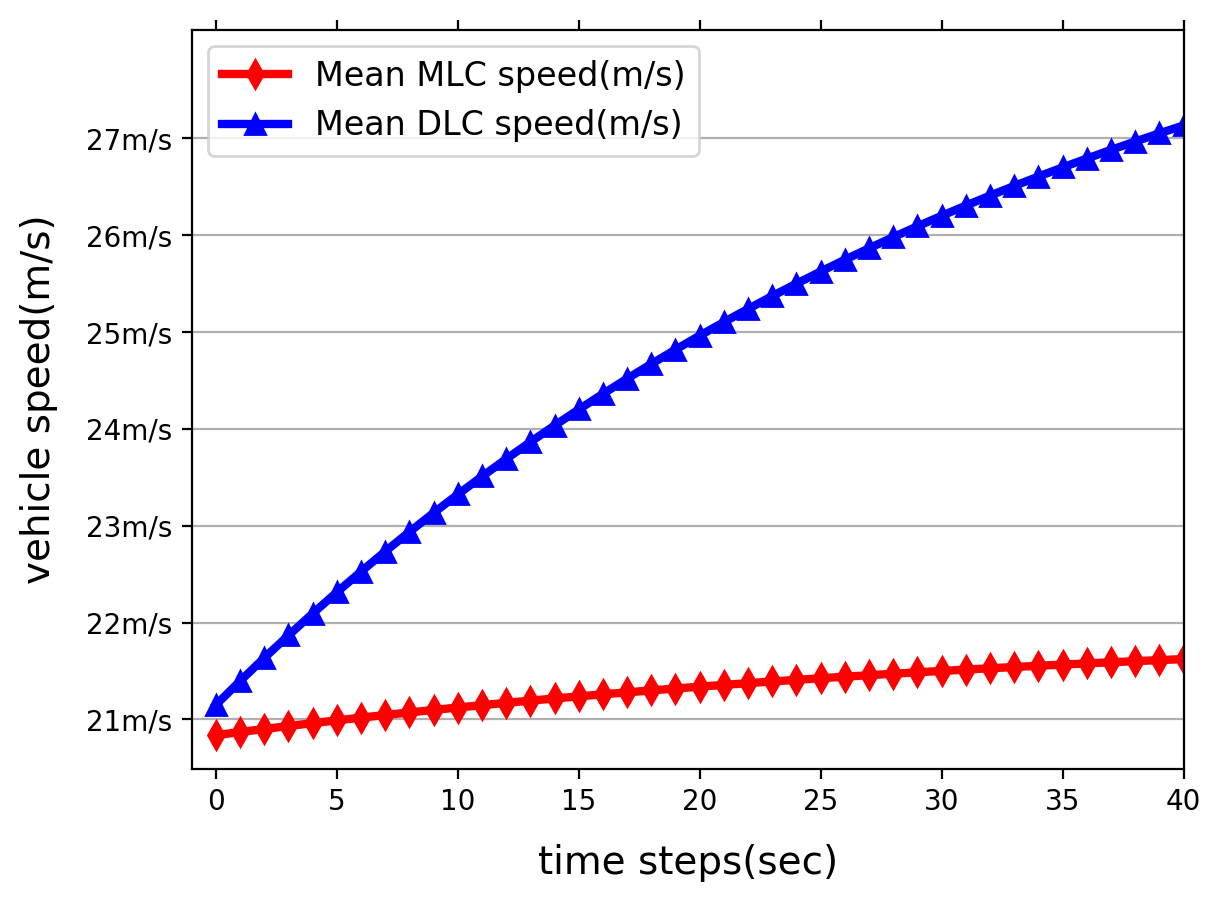

In [162]:
plt.plot(data["Time Steps(sec)"],data['Avg MLC Speed(m/s)'],  'r', linestyle='solid',label="Mean MLC speed(m/s)", marker='d', markersize=7, linewidth=3)
plt.plot( data["Time Steps(sec)"],data['Avg DLC Speed(m/s)'], 'b', label="Mean DLC speed(m/s)", marker='^', markersize=7, linewidth=3)
linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}

plt.grid(True, axis='y')
plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
plt.xlim([-1, 40])
plt.tick_params(axis='x', top=True)
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.rcParams['figure.dpi'] = 200
plt.ylabel('vehicle speed(m/s)', labelpad=10, fontdict=font1)
plt.yticks([21,22,23,24,25,26,27], labels=['21m/s','22m/s','23m/s','24m/s','25m/s','26m/s','27m/s'])
plt.legend(fontsize=12)


plt.show()

In [ ]:
speed_metrics_df.plot(x="Time Steps(sec)", y=['Avg MLC Speed(m/s)', 'Avg DLC Speed(m/s)'])

## DLC Vehicles position vs MLC Vehicle positions

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
position_metrics_np = np.array(position_metrics)
print(position_metrics_np)

[[0.00000000e+00 9.06199015e+01 1.11563141e+02 ... 3.83356513e+02
  4.06842838e+02 4.28535650e+02]
 [1.00000000e+00 9.09611285e+01 1.11915880e+02 ... 3.83715131e+02
  4.07179171e+02 4.28893055e+02]
 [2.00000000e+00 9.13030621e+01 1.12272709e+02 ... 3.84077169e+02
  4.07515714e+02 4.29254422e+02]
 ...
 [1.79800000e+03 7.48970741e+02 1.00526174e+03 ... 1.27721238e+03
  1.06496363e+03 1.32240225e+03]
 [1.79900000e+03 7.49337407e+02 1.00576174e+03 ... 1.27771238e+03
  1.06533030e+03 1.32290225e+03]
 [1.80000000e+03 7.49704074e+02 1.00626174e+03 ... 1.27821238e+03
  1.06569696e+03 1.32340225e+03]]


In [50]:
time_steps = position_metrics_np[:, 0]
DLC_Vehicle1 = position_metrics_np[:, 2]
DLC_Vehicle2 = position_metrics_np[:, 4]
MLC_Vehicle1 = position_metrics_np[:, 3]
MLC_Vehicle2 = position_metrics_np[:, 5]

[0.00000000e+00 6.66666667e-02 1.33333333e-01 ... 1.19866667e+02
 1.19933333e+02 1.20000000e+02]


In [51]:
data = {'Time Steps(sec)': time_steps,
        'DLC_Vehicle1(m)': DLC_Vehicle1,
        'DLC_Vehicle2(m)': DLC_Vehicle2,
        'MLC_Vehicle1(m)': MLC_Vehicle1,
        'MLC_Vehicle2(m)': MLC_Vehicle2}
position_metrics_df = pd.DataFrame(data)

In [9]:
position_metrics_df.shape

(1801, 5)

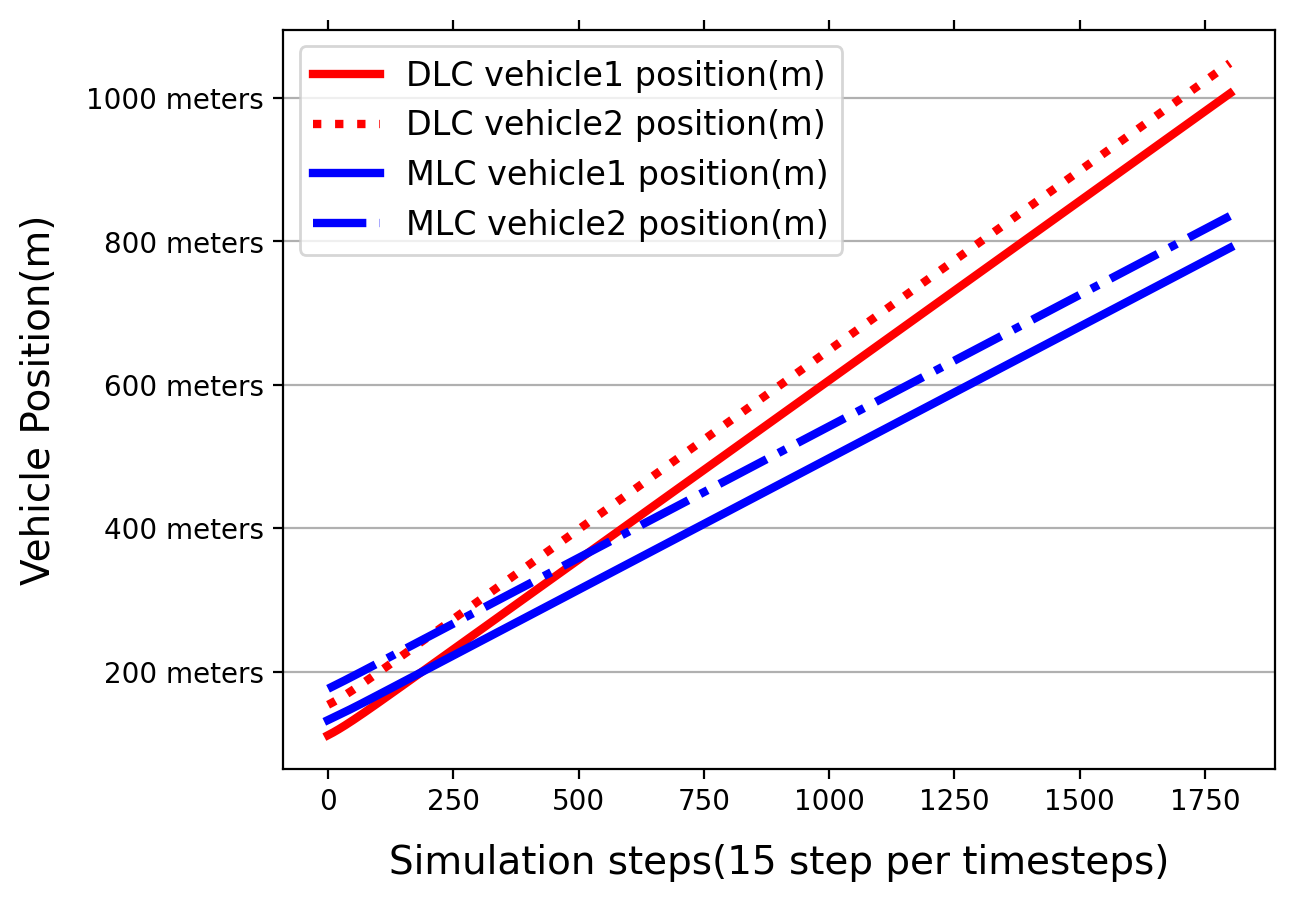

In [60]:
plt.plot(position_metrics_df["Time Steps(sec)"], position_metrics_df['DLC_Vehicle1(m)'], 'r-', label="DLC vehicle1 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['DLC_Vehicle2(m)'],  'r:', label="DLC vehicle2 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle1(m)'],  'b-', label="MLC vehicle1 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle2(m)'],  'b-.', label="MLC vehicle2 position(m)", markersize=7, linewidth=3)
#linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}
plt.tick_params(axis='x', top=True)
plt.xlabel('Simulation steps(15 step per timesteps)', labelpad=10, fontdict=font1)
plt.grid(True, axis='y')
#plt.xlim([-1, 40])
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.ylabel('Vehicle Position(m)', labelpad=10, fontdict=font1)
plt.rcParams['figure.dpi'] = 200
plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
plt.legend(fontsize=12)


plt.show()

## Training Algorithms graphs

In [63]:
#A16 = np.loadtxt('Trained_model_logs/Datasets/A2C_16Agents.csv', delimiter=',')
A16 = pd.read_csv('Trained_model_logs/Datasets/A2C_16Agents.csv')
A24 = pd.read_csv('Trained_model_logs/Datasets/A2C_24Agents.csv')
P16 = pd.read_csv('Trained_model_logs/Datasets/PPO_16Agents.csv')
P24 = pd.read_csv('Trained_model_logs/Datasets/PPO_324Agents.csv')


In [65]:
A24.head()

,Wall time,Step,Value
0,1.669470e+09,4000,-3.290537
1,1.669471e+09,8000,-1.014371
2,1.669471e+09,12000,8.583085
3,1.669471e+09,16000,9.197821
4,1.669471e+09,20000,13.858041


In [76]:
data = {'Episode(Steps)': A16['Step'],
        'EpisodePPO': P16["Step"],
        'A2C_16': A16["Value"],
        'A2C_24': A24["Value"],
        'PPO_16': P16["Value"],
        'PPO_24': P24["Value"]}
data = pd.DataFrame(data)

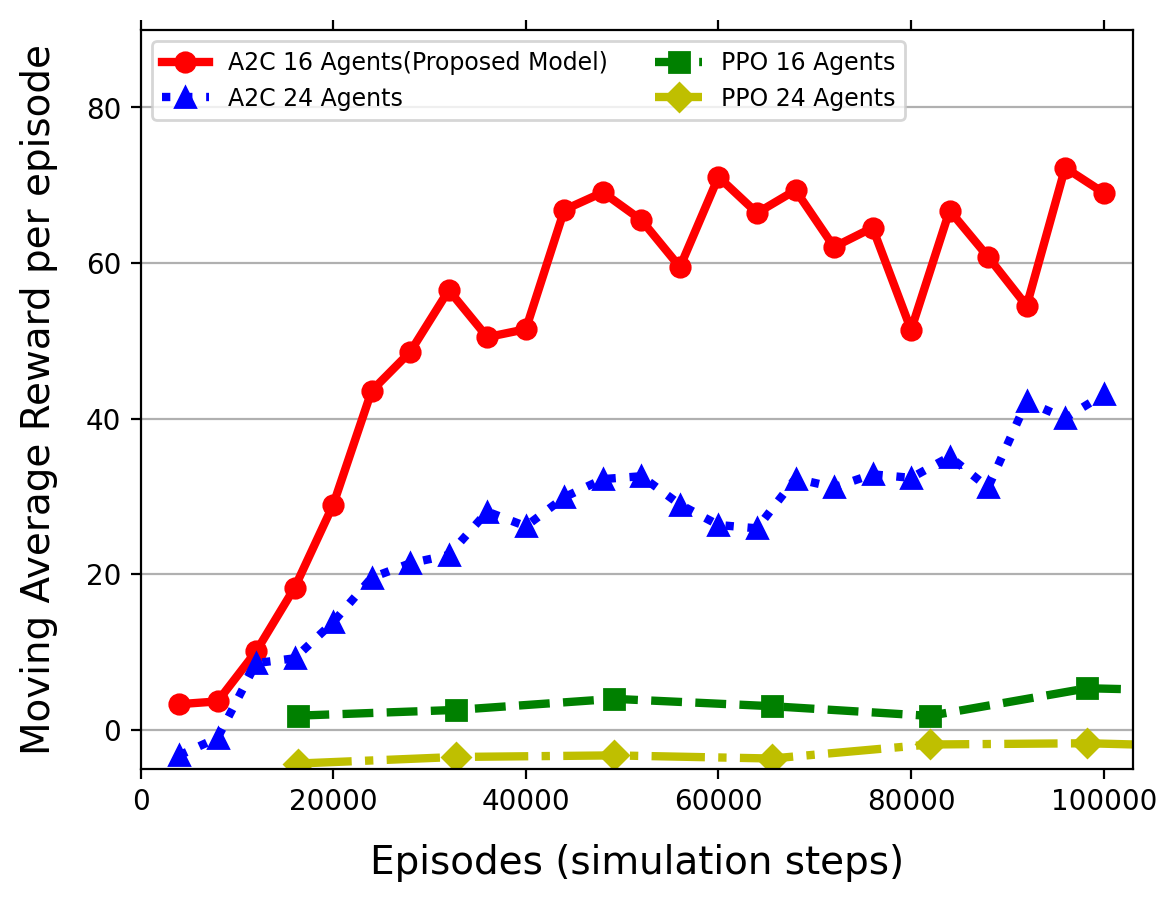

In [107]:
plt.plot(data['Episode(Steps)'], data['A2C_16'], 'r-o', label="A2C 16 Agents(Proposed Model)", markersize=7, linewidth=3)
plt.plot(data['Episode(Steps)'], data['A2C_24'], 'b:^', label="A2C 24 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_16'], 'g--s', label="PPO 16 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_24'], 'y-.D', label="PPO 24 Agents", markersize=7, linewidth=3)

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}
plt.tick_params(axis='x', top=True)
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.grid(True, axis='y')
plt.xlim([0, 103000])
plt.ylim([-5, 90])
#plt.axis([-1, 40, 20, 28])
plt.ylabel('Moving Average Reward per episode', labelpad=10, fontdict=font1)
plt.rcParams['figure.dpi'] = 200
#plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
plt.legend(fontsize=8.5, ncol=2, loc='upper left')


## Graph Human Vehicle Position vs DLC vehicle Position

In [118]:
position_dlc_np = np.loadtxt('Trained_model_logs/Datasets/position_dlc.txt')
position_human_np = np.loadtxt('Trained_model_logs/Datasets/position_human.txt')

In [119]:
position_human_np.shape

(47, 2)

In [120]:
position_dlc_np.shape

(30, 2)

In [121]:
timesteps = []
for i in range(1,51):
    timesteps.append(i)


#Create Dataframe
data = pd.DataFrame(position_human_np[:,1], columns=['HVpos'])

fill = pd.DataFrame({'HVpos': [0,0,0]})
data = data.append(fill ,ignore_index = True)
data['Time steps(Sec)'] = timesteps
print(data)

          HVpos  Time steps(Sec)
0    114.790423                1
1    135.574400                2
2    155.391928                3
3    174.338935                4
4    192.547821                5
5    210.148724                6
6    227.269686                7
7    244.037235                8
8    260.572112                9
9    276.925312               10
10   292.976763               11
11   309.225990               12
12   326.824076               13
13   345.142181               14
14   363.947933               15
15   383.088948               16
16   402.464218               17
17   422.008038               18
18   441.677748               19
19   461.445299               20
20   481.291801               21
21   501.204114               22
22   521.172747               23
23   541.190564               24
24   561.252001               25
25   581.352569               26
26   601.488543               27
27   621.656766               28
28   641.854515               29
29   662.0

In [122]:
data['DlCpos'] = pd.Series(position_dlc_np[:,1])
data.replace(0, np.nan, inplace=True)
data.tail()

,HVpos,Time steps(Sec),DlCpos
45,991.422085,46,NaN
46,1013.226845,47,NaN
47,NaN,48,NaN
48,NaN,49,NaN
49,NaN,50,NaN


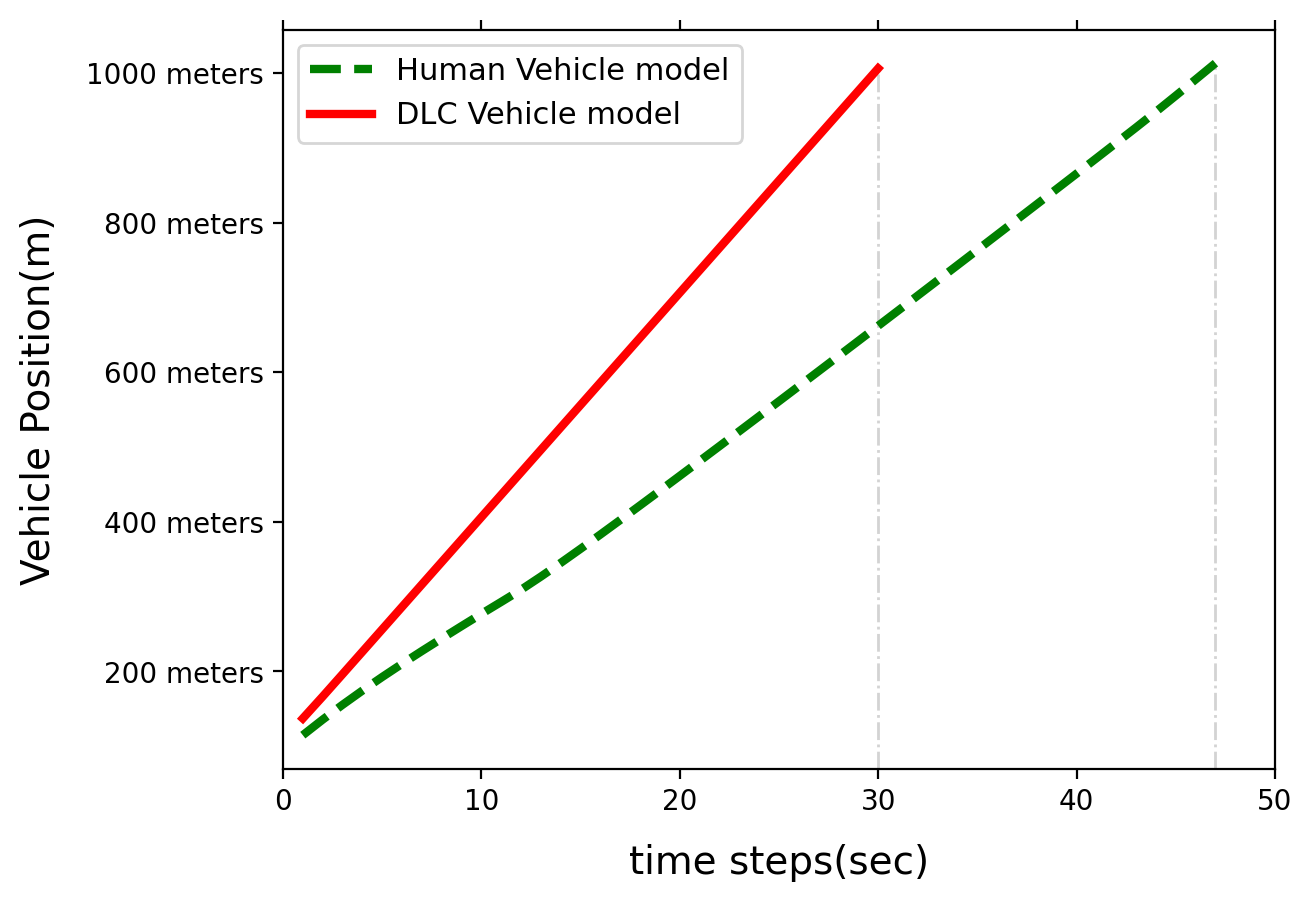

In [155]:
plt.axvline(30, 0, 0.95, color='lightgray', linestyle='dashdot', linewidth=1)
plt.axvline(47, 0, 0.95, color='lightgray', linestyle='dashdot', linewidth=1)
plt.plot(data['Time steps(Sec)'], data['HVpos'], 'g--', label="Human Vehicle model", markersize=7, linewidth=3)
plt.plot(data['Time steps(Sec)'], data['DlCpos'], 'r-', label="DLC Vehicle model", markersize=7, linewidth=3)


#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}
plt.tick_params(axis='x', top=True)
plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
#plt.grid(True, axis='x')
plt.xlim([0, 50])
#plt.ylim([-5, 90])
#plt.axis([-1, 40, 20, 28])

plt.ylabel('Vehicle Position(m)', labelpad=10, fontdict=font1)
plt.rcParams['figure.dpi'] = 200
plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
plt.legend(fontsize=11, loc='upper left')